In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the data as array 
df = pd.read_excel("LAmeantempdata.xlsx")
data=df.to_numpy()
data

array([[1878.        ,   55.2       ,   55.3       , ...,   64.6       ,
          59.2       ,   54.6       ],
       [1879.        ,   52.2       ,   56.        , ...,   65.3       ,
          56.6       ,   53.        ],
       [1880.        ,   52.9       ,   50.8       , ...,   63.4       ,
          56.1       ,   56.3       ],
       ...,
       [2019.        ,   57.9       ,   54.        , ...,   72.        ,
          64.9       ,   59.4       ],
       [2020.        ,   60.9       ,   62.6       , ...,   73.        ,
          62.8       ,   60.        ],
       [          nan,           nan,           nan, ...,   68.10140845,
          63.04366197,   58.32253521]])

In [4]:
july=data[:,7]
N=10
#K=1000
#increase K to 10,000 to make it closer to Gaussian
K=10000
mu=np.mean(july)
sig=np.std(july)
print('mean Los Angeles July temp is '+str(mu.round(2))+' deg F')
print('standard deviation is '+str(sig.round(2))+' deg F')

mean Los Angeles July temp is 72.31 deg F
standard deviation is 2.7 deg F


In [5]:
#repeat random sampling 
M=np.zeros(K)
for n in range(0,K):
    data=np.random.choice(july,10,replace=False)
    M[n]=np.mean(data)

In [6]:
#population mean
Mmean=np.mean(M)
print('Mean of sample mean is '+str(Mmean.round(2))+'deg F')

Mean of sample mean is 72.31deg F


In [7]:
#standard error (standard deviation of sample mean)
Mstd=np.std(M)
SE = sig/np.sqrt(N)
print('std of sample mean is '+str(Mstd.round(2))+' deg F')
#sigma/sqrt(N)
print('sigma/sqrt(N) is '+str(SE.round(2))+' deg F')

std of sample mean is 0.85 deg F
sigma/sqrt(N) is 0.85 deg F


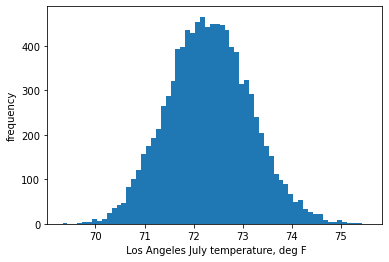

In [8]:
#box plot
bins=np.arange(np.min(M),np.max(M),0.1)
plt.hist(M,bins)
plt.xlabel(' Los Angeles July temperature, deg F')
plt.ylabel('frequency');
plt.show()

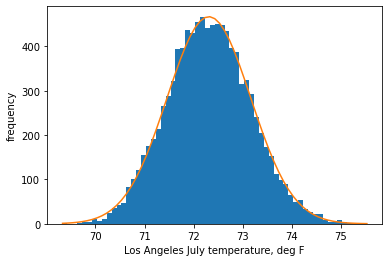

In [9]:
#gaussian overlay
plt.hist(M,bins)
x=bins
f=K*0.1/np.sqrt(2*np.pi)/SE*np.exp(-0.5*((x-mu)/SE)**2)
plt.plot(x,f)
plt.xlabel('Los Angeles July temperature, deg F')
plt.ylabel('frequency');

In [10]:
#calcualte 95 percentile
t95=np.percentile(M,95)
print('95 percentile temp is '+str(t95.round(2))+' deg F')

95 percentile temp is 73.72 deg F


In [11]:
#calculate 99 percentile
t99=np.percentile(M,99)
print('99 percentile temp is '+str(t99.round(2))+' deg F')

99 percentile temp is 74.35 deg F


In [12]:
#last N years mean
tN=np.mean(july[-10:])
print('Last 10 year mean July temp is '+str(tN.round(2))+' deg F')

Last 10 year mean July temp is 74.14 deg F


In [13]:
#compare to 95 percentile 
tN>t95

True

In [15]:
#compare to 99 percentile
tN>t99

False